Instructions for students:

Run each cell in this notebook, one by one, reading the comment above the cell first. This will aid in understanding what the code is doing.

After running all cells, try experimenting with the network architecture. Try adding more layers or changing the number of units in the layer. Can you increase the performance of the model?

# Common Practices in Deep Learning

Tecnhiques and guidelines for improving model generalisation.

### Overfitting and Underfitting

#### Noisy training data

Overfitting and underfitting are common challenges in machine learning, occurring when the model's performance on the training data does not generalize well to unseen data. Noisy data exacerbates these issues by introducing additional complexity and variability into the training process.

    Overfitting:
        Overfitting occurs when a model learns the training data too well, capturing noise and irrelevant patterns present in the data rather than the underlying true relationships.
        In the context of noisy data, overfitting can be particularly problematic because the model may start to learn from the noise itself, rather than the true signal.
        For example, if there are outliers or random fluctuations in the data, an overfitted model may fit these fluctuations rather than the underlying trends, leading to poor generalization performance on new data.
        Overfitting can be identified by observing a large gap between the model's performance on the training data and its performance on unseen validation or test data.

    Underfitting:
        Underfitting occurs when a model is too simple to capture the underlying structure of the data, resulting in poor performance on both the training and unseen data.
        In the presence of noisy data, underfitting may occur if the model is not complex enough to capture important patterns or relationships.
        For example, if the model is too simple, it may overlook subtle but important features in the data, leading to suboptimal performance.
        Underfitting can be identified by observing poor performance on both the training and validation/test datasets.

Dealing with noisy data requires careful consideration to mitigate the effects of overfitting and underfitting:

    Regularization techniques, such as L1 or L2 regularization, dropout, or early stopping, can help prevent overfitting by penalizing overly complex models.
    Feature selection or dimensionality reduction techniques can help reduce the impact of noisy or irrelevant features on the model's performance.
    Ensuring an adequate amount of training data and using cross-validation techniques can help identify and mitigate both underfitting and overfitting.
    Robust models, such as ensemble methods or models trained with robust loss functions, may also be more resistant to the effects of noisy data.

#### Ambiguous features

Overfitting and underfitting can occur when dealing with ambiguous features, which are features that do not have a clear or consistent relationship with the target variable. Here's how these phenomena manifest in the context of ambiguous features:

    Overfitting:
        When dealing with ambiguous features, overfitting can occur if the model learns to fit noise or random fluctuations in the data rather than capturing the true underlying patterns.
        The model may pick up on spurious correlations or irrelevant details in the ambiguous features, leading to overly complex decision boundaries.
        For example, if a feature has some random fluctuations or noise, an overfitted model may mistakenly learn to rely on these fluctuations, resulting in poor generalization to new data.
        Overfitting can be detected by observing a significant difference in performance between the training data and unseen validation or test data.

    Underfitting:
        Underfitting with ambiguous features may occur if the model is too simple to capture any useful information contained within these features.
        If the model is not complex enough, it may fail to capture subtle relationships or patterns that exist within the ambiguous features, leading to poor performance.
        For instance, if a feature contains some important but non-obvious information, an underfitted model may overlook it, resulting in suboptimal performance.
        Underfitting can be identified by observing poor performance on both the training and validation/test datasets.

Dealing with ambiguous features requires careful consideration to mitigate the effects of overfitting and underfitting:

    Feature engineering techniques, such as transformation, scaling, or combining features, may help make ambiguous features more informative and easier for the model to learn from.
    Regularization techniques can help prevent overfitting by penalizing overly complex models, thus encouraging them to focus on more relevant features.
    Ensuring an adequate amount of training data and using cross-validation techniques can help identify and mitigate both underfitting and overfitting.
    Domain knowledge and careful inspection of feature importance can guide the selection and interpretation of ambiguous features, helping to build more robust models.

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
len(train_images_with_noise_channels)

60000

In [3]:
len(train_labels)

60000

In [4]:
train_images_with_noise_channels.shape

(60000, 1568)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [5]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 9s 12ms/step - loss: 0.6161 - accuracy: 0.8125 - val_loss: 0.2773 - val_accuracy: 0.9211
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2610 - accuracy: 0.9193 - val_loss: 0.1799 - val_accuracy: 0.9468
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1694 - accuracy: 0.9469 - val_loss: 0.1464 - val_accuracy: 0.9560
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1205 - accuracy: 0.9621 - val_loss: 0.1587 - val_accuracy: 0.9538
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0896 - accuracy: 0.9719 - val_loss: 0.1201 - val_accuracy: 0.9653
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0665 - accuracy: 0.9787 - val_loss: 0.1215 - val_accuracy: 0.9647
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0493 - accuracy: 0.9842 - val_loss: 0.1326 - val_accuracy: 0.9635
Epoch

**Plotting a validation accuracy comparison**

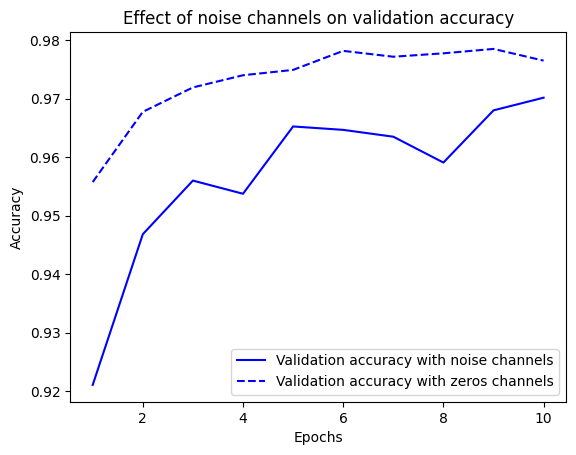

In [6]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

Even though the data contains the same information in both cases, the validation accuracy of the model trained with noise is lss than the model trained with spurious correlations (zeros). The more noise you add, the more accuracy will degrade.

## Evaluating machine-learning models


In deep learning, the dataset is typically divided into three main subsets: training set, validation set, and test set. Each subset serves a specific purpose in the model development and evaluation process:

    Training Set:
        The training set is used to train the model's parameters (i.e., weights and biases) using optimization algorithms such as gradient descent.
        It contains a large portion of the available data and is used to teach the model to learn the underlying patterns and relationships in the data.
        During the training process, the model is exposed to examples from the training set iteratively, and its parameters are adjusted to minimize the difference between the predicted outputs and the actual targets.

    Validation Set:
        The validation set is used to tune hyperparameters and monitor the model's performance during training.
        It is used to evaluate the model's performance on unseen data that is different from the training set. This helps assess how well the model generalizes to new data.
        Hyperparameters such as learning rate, regularization strength, and network architecture are adjusted based on the performance of the model on the validation set.
        The validation set helps prevent overfitting by providing an unbiased estimate of the model's performance on unseen data.

    Test Set:
        The test set is used to evaluate the final performance of the trained model after hyperparameter tuning and model selection are complete.
        It serves as an independent dataset that the model has not seen during training or validation.
        The test set provides an unbiased estimate of the model's performance on completely unseen data, helping to assess how well the model generalizes to real-world scenarios.
        The results obtained on the test set are used to report the final performance metrics of the model.

It's important to ensure that the data distribution in each subset is representative of the overall dataset to avoid biased evaluations. Typically, the dataset is randomly shuffled and then divided into training, validation, and test sets using a predetermined ratio, such as 70-15-15 or 80-10-10. Additionally, techniques such as cross-validation or stratified sampling can be used to ensure robustness in the evaluation process.

## Improving model fit


Hyperparameter tuning is the process of selecting the optimal hyperparameters for a deep learning model to achieve better performance on a given task. Hyperparameters are parameters that are set before the training process begins and are not learned during training. They include parameters such as learning rate, batch size, number of layers, number of units per layer, activation functions, regularization strength, optimizer type, and more.

Here's how hyperparameter tuning typically works in the context of deep learning:

    Define Hyperparameter Search Space:
        The first step in hyperparameter tuning is to define the search space for each hyperparameter. This involves specifying the range or set of values that each hyperparameter can take.
        For example, the learning rate might be searched over a range from 0.001 to 0.1, the number of units per layer might be chosen from a set {32, 64, 128}, and so on.    

    Evaluation on Validation Set:
        For each set of hyperparameters sampled from the search space, the model is trained on the training set and evaluated on the validation set.
        The performance metric used for evaluation depends on the specific task and can include accuracy, loss, F1 score, precision, recall, etc.

    Select Optimal Hyperparameters:
        After evaluating the model with different sets of hyperparameters, the combination that yields the best performance on the validation set is selected.
        It's essential to prevent overfitting to the validation set by not using it too many times for hyperparameter tuning.

    Assess Generalization Performance:
        Once the optimal hyperparameters are chosen based on the validation set, the model's generalization performance is assessed on a separate test set.
        This provides an unbiased estimate of how well the model will perform on unseen data in real-world scenarios.

    Iterative Process:
        Hyperparameter tuning is often an iterative process where the model is trained multiple times with different hyperparameter configurations until satisfactory performance is achieved.
        It may involve refining the search space, changing the search strategy, or incorporating domain knowledge to guide the search process.

Overall, hyperparameter tuning is a crucial step in deep learning model development, as it can significantly impact the model's performance and generalization ability.

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

Let's set the learning rate = 1 in the below cell.
We can see that this model reaches a low training and validation accuracy and cannot get past that.

In [7]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 695.2733 - accuracy: 0.3734 - val_loss: 2.2379 - val_accuracy: 0.2432
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 2.9671 - accuracy: 0.2527 - val_loss: 2.9329 - val_accuracy: 0.2317
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 2.4130 - accuracy: 0.2141 - val_loss: 2.3540 - val_accuracy: 0.2476
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 2.6342 - accuracy: 0.2092 - val_loss: 2.1454 - val_accuracy: 0.1928
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3837 - accuracy: 0.2006 - val_loss: 2.0822 - val_accuracy: 0.2486
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3320 - accuracy: 0.2030 - val_loss: 2.2557 - val_accuracy: 0.2222
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3859 - accuracy: 0.2139 - val_loss: 2.3452 - val_accuracy: 0.1618
Epoc

**The same model with a more appropriate learning rate**

In [8]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3629 - accuracy: 0.9118 - val_loss: 0.1518 - val_accuracy: 0.9548
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1284 - accuracy: 0.9638 - val_loss: 0.1752 - val_accuracy: 0.9564
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0975 - accuracy: 0.9737 - val_loss: 0.1548 - val_accuracy: 0.9679
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0818 - accuracy: 0.9792 - val_loss: 0.1549 - val_accuracy: 0.9701
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0688 - accuracy: 0.9824 - val_loss: 0.2219 - val_accuracy: 0.9625
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0634 - accuracy: 0.9849 - val_loss: 0.2009 - val_accuracy: 0.9661
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0481 - accuracy: 0.9874 - val_loss: 0.2043 - val_accuracy: 0.9691
Epoch 

### Leveraging better architecture priors


Improving generalization in deep learning involves selecting better architectures, which refers to designing more effective neural network structures to capture underlying patterns in data while avoiding overfitting. Here's how to achieve this:

Understand the Problem: Before choosing an architecture, it's crucial to understand the problem domain, including the nature of the data, its complexity, and the task at hand (e.g., classification, regression, etc.).

Start with Simple Architectures: Begin with simple architectures, such as basic feedforward neural networks, and gradually increase complexity as needed. Simple models are less prone to overfitting and easier to interpret.

Explore Existing Architectures: There are numerous pre-designed architectures available, such as LeNet, AlexNet, VGG, Inception, ResNet, and more. These architectures are often designed by experts and have been proven effective for various tasks. Experimenting with these architectures can provide valuable insights.

Adapt Existing Architectures: Modify existing architectures to better suit your specific task or dataset. This could involve changing the number of layers, layer sizes, activation functions, or adding regularization techniques such as dropout or batch normalization.

Use Transfer Learning: Transfer learning involves leveraging pre-trained models trained on large datasets for a similar task and fine-tuning them on your specific dataset. This approach is particularly effective when you have limited data. You can use the pre-trained model as a feature extractor or fine-tune the entire network.

Regularization Techniques: Employ regularization techniques to prevent overfitting, such as L1 and L2 regularization, dropout, batch normalization, early stopping, and data augmentation. These techniques help the model generalize better by reducing its reliance on noise or irrelevant features in the data.

Experimentation and Evaluation: Experiment with different architectures and hyperparameters to find the best combination for your specific task and dataset. Use appropriate evaluation metrics and validation techniques to assess the performance of each model.    

Monitor Performance: Continuously monitor the performance of your models on both the training and validation datasets. Look for signs of overfitting or underfitting and adjust the architecture or hyperparameters accordingly.
    

By carefully selecting or designing appropriate architectures and employing regularization techniques, transfer learning, and ensemble methods, you can significantly improve the generalization performance of your deep learning models. Experimentation and thorough evaluation are key to finding the best approach for your specific problem.

### Increasing model capacity

**A simple logistic regression on MNIST**

This model contains one layer.

In [9]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.6652 - accuracy: 0.8373 - val_loss: 0.3627 - val_accuracy: 0.9016
Epoch 2/20
375/375 [==============================] - 1s 4ms/step - loss: 0.3532 - accuracy: 0.9029 - val_loss: 0.3100 - val_accuracy: 0.9147
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3178 - accuracy: 0.9110 - val_loss: 0.2938 - val_accuracy: 0.9197
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3018 - accuracy: 0.9155 - val_loss: 0.2839 - val_accuracy: 0.9219
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2924 - accuracy: 0.9185 - val_loss: 0.2793 - val_accuracy: 0.9219
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2854 - accuracy: 0.9195 - val_loss: 0.2766 - val_accuracy: 0.9244
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2808 - accuracy: 0.9219 - val_loss: 0.2720 - val_accuracy: 0.9260
Epoch 

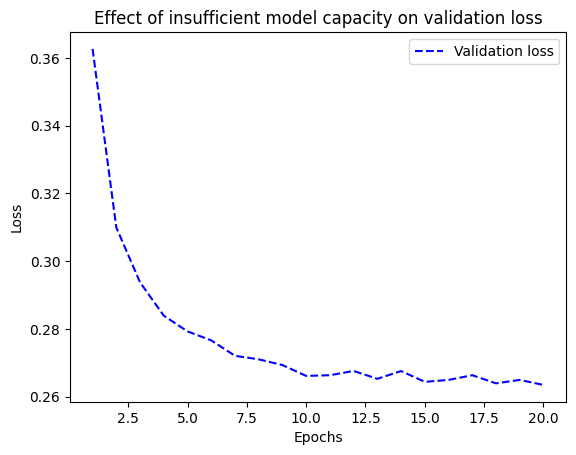

In [10]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

Lets increase the capacity of the model and evaluate its performance compared to the model with a single layer.

In [11]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3657 - accuracy: 0.8956 - val_loss: 0.1905 - val_accuracy: 0.9454
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1593 - accuracy: 0.9528 - val_loss: 0.1427 - val_accuracy: 0.9588
Epoch 3/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1111 - accuracy: 0.9668 - val_loss: 0.1103 - val_accuracy: 0.9668
Epoch 4/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0852 - accuracy: 0.9739 - val_loss: 0.0997 - val_accuracy: 0.9704
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0687 - accuracy: 0.9791 - val_loss: 0.0987 - val_accuracy: 0.9716
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0558 - accuracy: 0.9832 - val_loss: 0.1009 - val_accuracy: 0.9700
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0465 - accuracy: 0.9857 - val_loss: 0.0945 - val_accuracy: 0.9732
Epoch 

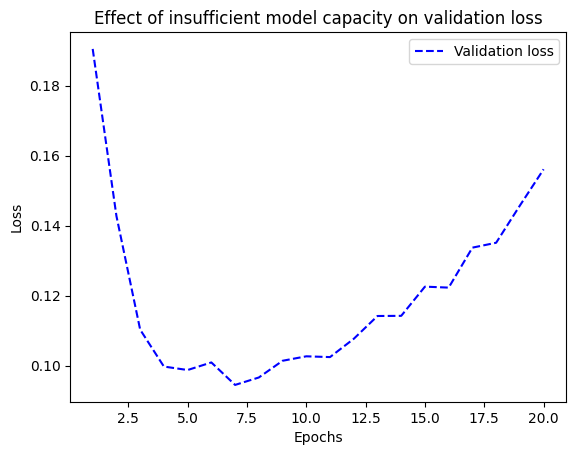

In [12]:
import matplotlib.pyplot as plt
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

### Reducing the network's size

Often you need to find a balance between too much capacity and not enough capacity. There is no general rule for this and is highly dependent on many different factors.

**Original model**

In [13]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 4s 65ms/step - loss: 0.5412 - accuracy: 0.7629 - val_loss: 0.3932 - val_accuracy: 0.8695
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3254 - accuracy: 0.8903 - val_loss: 0.3089 - val_accuracy: 0.8842
Epoch 3/20
30/30 [==============================] - 1s 30ms/step - loss: 0.2417 - accuracy: 0.9193 - val_loss: 0.2826 - val_accuracy: 0.8900
Epoch 4/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1928 - accuracy: 0.9373 - val_loss: 0.2913 - val_accuracy: 0.8831
Epoch 5/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1629 - accuracy: 0.9455 - val_loss: 0.2800 - val_accuracy: 0.8879
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1387 - accuracy: 0.9545 - val_loss: 0.3167 - val_accuracy: 0.8766
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1184 - accurac

**Version of the model with lower capacity**

In [14]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 62ms/step - loss: 0.6320 - accuracy: 0.7449 - val_loss: 0.5654 - val_accuracy: 0.8539
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.5043 - accuracy: 0.8711 - val_loss: 0.4626 - val_accuracy: 0.8692
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.4065 - accuracy: 0.8911 - val_loss: 0.3919 - val_accuracy: 0.8732
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3348 - accuracy: 0.9038 - val_loss: 0.3482 - val_accuracy: 0.8763
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2820 - accuracy: 0.9172 - val_loss: 0.3204 - val_accuracy: 0.8784
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2425 - accuracy: 0.9259 - val_loss: 0.2910 - val_accuracy: 0.8883
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2121 - accuracy: 0.9325 - val_loss: 0.2815 - val_accuracy: 0.8906
Epoch 8/20
30

**Version of the model with higher capacity**

In [15]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 74ms/step - loss: 0.5674 - accuracy: 0.7121 - val_loss: 0.4010 - val_accuracy: 0.8248
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3255 - accuracy: 0.8662 - val_loss: 0.3013 - val_accuracy: 0.8762
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2456 - accuracy: 0.8987 - val_loss: 0.2698 - val_accuracy: 0.8894
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1799 - accuracy: 0.9323 - val_loss: 0.2682 - val_accuracy: 0.8923
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1314 - accuracy: 0.9527 - val_loss: 0.3224 - val_accuracy: 0.8799
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.0998 - accuracy: 0.9668 - val_loss: 0.7850 - val_accuracy: 0.7730
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.0833 - accuracy: 0.9725 - val_loss: 0.4000 - val_accuracy: 0.8578
Epoch 8/20
30

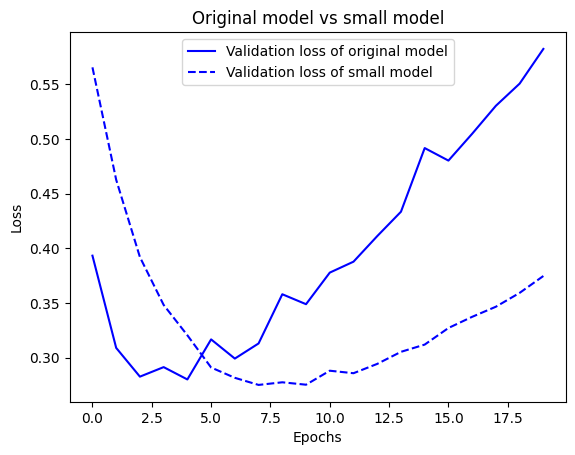

In [16]:
val_loss_original = history_original.history["val_loss"]
val_loss_small = history_smaller_model.history["val_loss"]
epochs = range(0, 20)
plt.plot(epochs, val_loss_original, "b-",
         label="Validation loss of original model")
plt.plot(epochs, val_loss_small, "b--",
         label="Validation loss of small model")
plt.title("Original model vs small model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

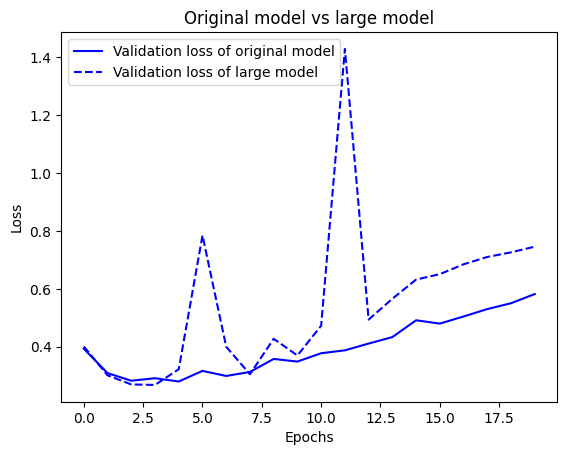

In [17]:
val_loss_original = history_original.history["val_loss"]
val_loss_large = history_larger_model.history["val_loss"]
epochs = range(0, 20)
plt.plot(epochs, val_loss_original, "b-",
         label="Validation loss of original model")
plt.plot(epochs, val_loss_large, "b--",
         label="Validation loss of large model")
plt.title("Original model vs large model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

Observe which model performs better on the validation set during training.

### Adding weight regularization

**Adding L2 weight regularization to the model**

In [18]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 85ms/step - loss: 0.6353 - accuracy: 0.7647 - val_loss: 0.5002 - val_accuracy: 0.8656
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.4284 - accuracy: 0.8908 - val_loss: 0.4127 - val_accuracy: 0.8729
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3451 - accuracy: 0.9099 - val_loss: 0.3654 - val_accuracy: 0.8881
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3003 - accuracy: 0.9214 - val_loss: 0.3516 - val_accuracy: 0.8897
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2775 - accuracy: 0.9293 - val_loss: 0.3783 - val_accuracy: 0.8720
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2570 - accuracy: 0.9388 - val_loss: 0.3581 - val_accuracy: 0.8844
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2477 - accuracy: 0.9415 - val_loss: 0.3522 - val_accuracy: 0.8859
Epoch 8/20
30

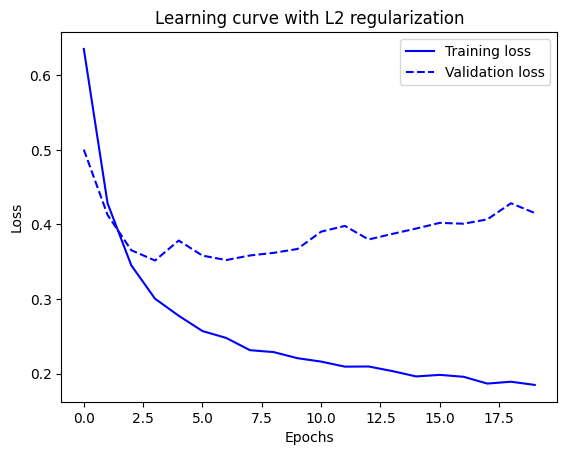

In [19]:
train_loss_l2 = history_l2_reg.history["loss"]
val_loss_l2 = history_l2_reg.history["val_loss"]
epochs = range(0, 20)
plt.plot(epochs, train_loss_l2, "b-",
         label="Training loss")
plt.plot(epochs, val_loss_l2, "b--",
         label="Validation loss")
plt.title("Learning curve with L2 regularization")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

Adding more layers and changing the number of units in each layer:

In [20]:
from tensorflow.keras import regularizers
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(32, kernel_regularizer=regularizers.l2(0.002), activation="relu"),
    layers.Dense(32, kernel_regularizer=regularizers.l2(0.002), activation="relu"),
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.002), activation="relu"),
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.002), activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

history_l2_reg = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)


Epoch 1/20
30/30 [==============================] - 3s 64ms/step - loss: 0.7813 - accuracy: 0.7330 - val_loss: 0.6008 - val_accuracy: 0.8526
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.5180 - accuracy: 0.8760 - val_loss: 0.4855 - val_accuracy: 0.8792
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.4177 - accuracy: 0.9055 - val_loss: 0.4814 - val_accuracy: 0.8694
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3790 - accuracy: 0.9157 - val_loss: 0.4360 - val_accuracy: 0.8825
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3443 - accuracy: 0.9265 - val_loss: 0.4258 - val_accuracy: 0.8876
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3146 - accuracy: 0.9384 - val_loss: 0.5285 - val_accuracy: 0.8499
Epoch 7/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2963 - accuracy: 0.9424 - val_loss: 0.5345 - val_accuracy: 0.8523
Epoch 8/20
30

 **In this modified architecture, I added two additional layers with 32 units each and reduced the number of units in the last two layers to 16. This creates a deeper network with more parameters for learning complex patterns in the data text**














**Different weight regularizers available in Keras**

In [21]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

### Adding dropout

Dropout is a regularization technique commonly used in deep learning to prevent overfitting and improve the generalization performance of neural networks. It was introduced by Srivastava et al. in their paper "Dropout: A Simple Way to Prevent Neural Networks from Overfitting."

The main idea behind dropout is to randomly "drop out" (i.e., set to zero) a proportion of the neurons in a layer during each training iteration. This means that at each training step, a different random subset of neurons is dropped out. Dropout can be applied to input neurons, hidden neurons, or both.

Here's how dropout works:

    During Training:
        At each training iteration, each neuron in the network is retained with a probability pp (often set to 0.5).
        The retained neurons contribute to the forward pass and backward pass calculations as usual.
        The dropped-out neurons do not contribute to the forward pass or backward pass, effectively removing them from the network for that iteration.
        This process is repeated for each training example, leading to different subsets of neurons being active or dropped out for each example.

    During Inference (Testing):
        During inference (when making predictions on new data), all neurons are used (i.e., no dropout is applied).
        However, the weights of the neurons are scaled by the dropout probability pp to account for the fact that more neurons are active during inference compared to training.

By randomly dropping out neurons during training, dropout introduces noise and prevents neurons from relying too heavily on specific input features or co-adapting to each other. This helps to prevent overfitting by encouraging the network to learn more robust and generalizable representations of the data.

**Adding dropout to the IMDB model**

In [22]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 5s 67ms/step - loss: 0.6439 - accuracy: 0.6185 - val_loss: 0.5347 - val_accuracy: 0.8414
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.5129 - accuracy: 0.7663 - val_loss: 0.4232 - val_accuracy: 0.8660
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.4293 - accuracy: 0.8248 - val_loss: 0.3435 - val_accuracy: 0.8821
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3671 - accuracy: 0.8620 - val_loss: 0.3045 - val_accuracy: 0.8854
Epoch 5/20
30/30 [==============================] - 1s 41ms/step - loss: 0.3130 - accuracy: 0.8831 - val_loss: 0.2842 - val_accuracy: 0.8897
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2822 - accuracy: 0.8986 - val_loss: 0.2766 - val_accuracy: 0.8867
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2466 - accuracy: 0.9159 - val_loss: 0.2830 - val_accuracy: 0.8827
Epoch 8/20
30

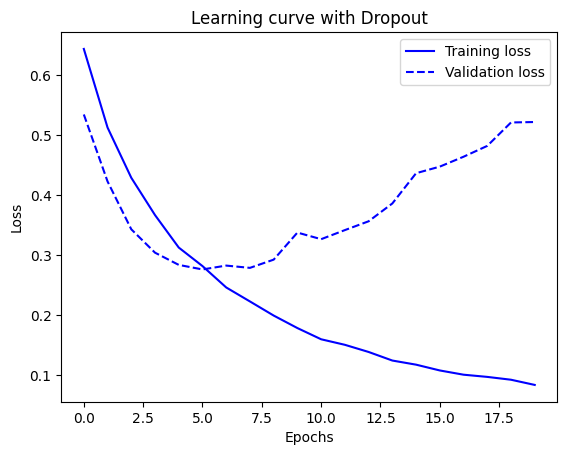

In [23]:
train_loss_d = history_dropout.history["loss"]
val_loss_d = history_dropout.history["val_loss"]
epochs = range(0, 20)
plt.plot(epochs, train_loss_d, "b-",
         label="Training loss")
plt.plot(epochs, val_loss_d, "b--",
         label="Validation loss")
plt.title("Learning curve with Dropout")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

Compare the learning curves above for the model trained with dropout and the model trained with l2 regularization. Observe when each model begins overfitting.

detailed  comparision is in the logbook

 Adjusting the dropout rate and add more layers to the model

In [24]:
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.3),  # Adjusting dropout rate here
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.3),  # Adjusting dropout rate here
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.3),  # Adjusting dropout rate here
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.3),  # Adjusting dropout rate here
    layers.Dense(1, activation="sigmoid")
])


Optimizing the learning rate of the optimizer can significantly impact the training process. The dropout rate determines the proportion of neurons to drop during training.

Lower dropout rates might be beneficial if the model is underfitting, while higher dropout rates can help prevent overfitting.